<a href="https://colab.research.google.com/github/DasSagor/CodeAlpha_HandwrittenCharacterRecognition/blob/main/Hand_written_CharacterRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install -q tensorflow-datasets

import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import json

In [ ]:
print("TensorFlow:", tf.__version__)
print("GPU:", tf.config.list_physical_devices('GPU'))

TensorFlow: 2.19.0
GPU: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
# ----------------------------
# Utility Functions
# ----------------------------
def plot_training_curves(history, name="Model"):
    """Plot accuracy & loss curves"""
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(history.history["accuracy"], label="Train Acc")
    if "val_accuracy" in history.history:
        plt.plot(history.history["val_accuracy"], label="Val Acc")
    plt.title(f"{name} Accuracy"); plt.xlabel("Epoch"); plt.legend()

    plt.subplot(1,2,2)
    plt.plot(history.history["loss"], label="Train Loss")
    if "val_loss" in history.history:
        plt.plot(history.history["val_loss"], label="Val Loss")
    plt.title(f"{name} Loss"); plt.xlabel("Epoch"); plt.legend()
    plt.show()

In [ ]:
def plot_confusion(y_true, y_pred, classes, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10,8))
    sns.heatmap(cm, annot=False, cmap="Blues", xticklabels=classes, yticklabels=classes)
    plt.xlabel("Predicted"); plt.ylabel("True")
    plt.title(title)
    plt.show()


In [ ]:
def visualize_samples(dataset, preprocess_fn, n=6, title="Samples"):
    ds_vis = dataset.map(preprocess_fn)
    plt.figure(figsize=(12,2))
    for i, (img, lbl) in enumerate(ds_vis.take(n)):
        plt.subplot(1,n,i+1)
        plt.imshow(tf.squeeze(img), cmap="gray")
        plt.title(int(lbl.numpy())); plt.axis("off")
    plt.suptitle(title); plt.show()


In [ ]:
# ============================================================
# Part 1: MNIST
# ============================================================
print("\n<<<< MNIST >>>>")

(ds_m_train, ds_m_test), info_m = tfds.load("mnist", split=["train","test"], as_supervised=True, with_info=True)

IMG_SIZE = 28
BATCH = 256
AUTOTUNE = tf.data.AUTOTUNE



<<<< MNIST >>>>


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/mnist/incomplete.HZSNE2_3.0.1/mnist-train.tfrecord*...:   0%|          | 0…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/mnist/incomplete.HZSNE2_3.0.1/mnist-test.tfrecord*...:   0%|          | 0/…

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


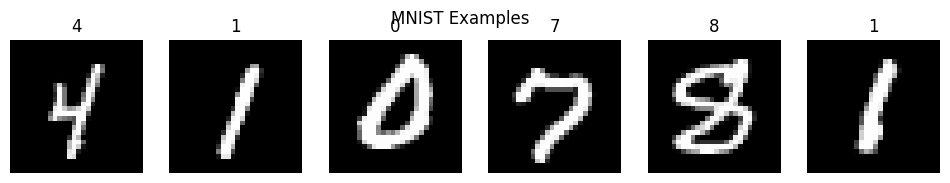

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,625,866 (6.20 MB)

 Trainable params: 1,625,866 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
235/235 - 16s - 68ms/step - accuracy: 0.9365 - loss: 0.2189 - val_accuracy: 0.9783 - val_loss: 0.0685
Epoch 2/20
235/235 - 4s - 15ms/step - accuracy: 0.9841 - loss: 0.0528 - val_accuracy: 0.9856 - val_loss: 0.0447
Epoch 3/20
235/235 - 5s - 22ms/step - accuracy: 0.9899 - loss: 0.0329 - val_accuracy: 0.9880 - val_loss: 0.0373
Epoch 4/20
235/235 - 4s - 15ms/step - accuracy: 0.9921 - loss: 0.0250 - val_accuracy: 0.9880 - val_loss: 0.0379
Epoch 5/20
235/235 - 3s - 15ms/step - accuracy: 0.9952 - loss: 0.0162 - val_accuracy: 0.9882 - val_loss: 0.0389
Epoch 6/20
235/235 - 4s - 17ms/step - accuracy: 0.9962 - loss: 0.0122 - val_accuracy: 0.9879 - val_loss: 0.0433
Epoch 7/20
235/235 - 4s - 18ms/step - accuracy: 0.9970 - loss: 0.0094 - val_accuracy: 0.9841 - val_loss: 0.0520
Epoch 8/20
235/235 - 4s - 15ms/step - accuracy: 0.9972 - loss: 0.0086 - val_accuracy: 0.9899 - val_loss: 0.0374
Epoch 9/20
235/235 - 4s - 15ms/step - accuracy: 0.9982 - loss: 0.0061 - val_accuracy: 0.9886 - val_loss

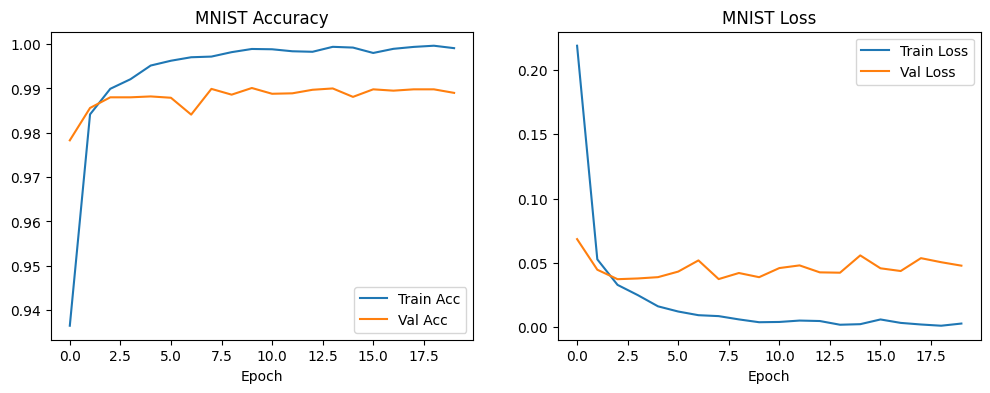

In [ ]:
def mnist_preprocess(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return tf.reshape(image, (IMG_SIZE, IMG_SIZE, 1)), label

mn_train = ds_m_train.map(mnist_preprocess, num_parallel_calls=AUTOTUNE).shuffle(10000).batch(BATCH).prefetch(AUTOTUNE)
mn_test  = ds_m_test.map(mnist_preprocess, num_parallel_calls=AUTOTUNE).batch(BATCH).prefetch(AUTOTUNE)

visualize_samples(ds_m_train, mnist_preprocess, n=6, title="MNIST Examples")

def build_mnist_cnn():
    inputs = tf.keras.Input((IMG_SIZE, IMG_SIZE, 1))
    x = tf.keras.layers.Conv2D(32, 3, activation="relu", padding="same")(inputs)
    x = tf.keras.layers.Conv2D(64, 3, activation="relu", padding="same")(x)
    x = tf.keras.layers.MaxPooling2D()(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(128, activation="relu")(x)
    outputs = tf.keras.layers.Dense(10, activation="softmax")(x)
    return tf.keras.Model(inputs, outputs)

mn_model = build_mnist_cnn()
mn_model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
mn_model.summary()

hist_mn = mn_model.fit(mn_train, validation_data=mn_test, epochs=20, verbose=2)
plot_training_curves(hist_mn, "MNIST")

MNIST Test Accuracy: 98.90%
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
              precision    recall  f1-score   support

           0     0.9898    0.9898    0.9898       980
           1     0.9912    0.9956    0.9934      1135
           2     0.9836    0.9893    0.9865      1032
           3     0.9940    0.9901    0.9921      1010
           4     0.9878    0.9898    0.9888       982
           5     0.9877    0.9877    0.9877       892
           6     0.9844    0.9906    0.9875       958
           7     0.9922    0.9844    0.9883      1028
           8     0.9857    0.9897    0.9877       974
           9     0.9930    0.9822    0.9875      1009

    accuracy                         0.9890     10000
   macro avg     0.9889    0.9889    0.9889     10000
weighted avg     0.9890    0.9890    0.9890     10000



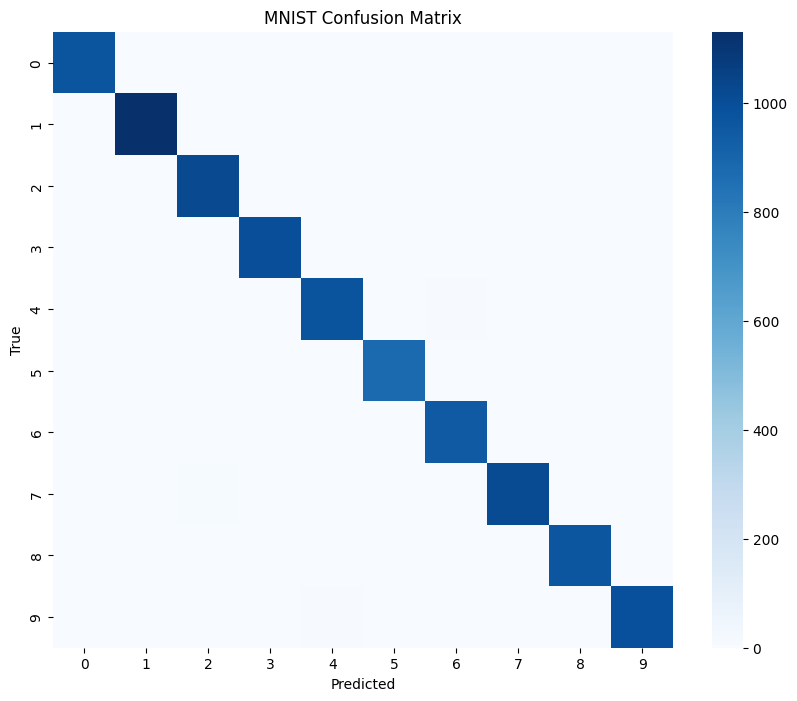

In [ ]:
# Evaluation
mn_eval = mn_model.evaluate(mn_test, verbose=0)
print(f"MNIST Test Accuracy: {mn_eval[1]*100:.2f}%")

y_true_m = np.concatenate([y.numpy() for _, y in mn_test], axis=0)
y_pred_m = np.argmax(mn_model.predict(mn_test), axis=1)
print(classification_report(y_true_m, y_pred_m, digits=4))
plot_confusion(y_true_m, y_pred_m, classes=list(range(10)), title="MNIST Confusion Matrix")

mn_model.save("mnist_final.keras")

In [ ]:
# ============================================================
# Part 2: EMNIST
# ============================================================
print("\n<<<< EMNIST Balanced >>>>")

(ds_e_train, ds_e_test), info_e = tfds.load("emnist/balanced", split=["train","test"], as_supervised=True, with_info=True)
em_classes = info_e.features["label"].num_classes
print("Number of EMNIST classes:", em_classes)


<<<< EMNIST Balanced >>>>


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/emnist/balanced/incomplete.SARIXO_3.1.0/emnist-train.tfrecord*...:   0%|  …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/emnist/balanced/incomplete.SARIXO_3.1.0/emnist-test.tfrecord*...:   0%|   …

Dataset emnist downloaded and prepared to /root/tensorflow_datasets/emnist/balanced/3.1.0. Subsequent calls will reuse this data.
Number of EMNIST classes: 47


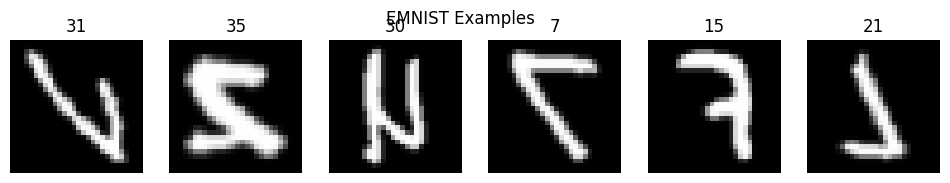

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     6,423,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 47)             │        24,111 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,816,815 (26.00 MB)

 Trainable params: 6,816,815 (26.00 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40
441/441 - 38s - 87ms/step - accuracy: 0.7557 - loss: 0.7886 - val_accuracy: 0.8605 - val_loss: 0.4104
Epoch 2/40
441/441 - 21s - 47ms/step - accuracy: 0.8529 - loss: 0.4243 - val_accuracy: 0.8706 - val_loss: 0.3692
Epoch 3/40
441/441 - 20s - 46ms/step - accuracy: 0.8714 - loss: 0.3639 - val_accuracy: 0.8806 - val_loss: 0.3345
Epoch 4/40
441/441 - 20s - 45ms/step - accuracy: 0.8803 - loss: 0.3289 - val_accuracy: 0.8868 - val_loss: 0.3199
Epoch 5/40
441/441 - 20s - 45ms/step - accuracy: 0.8880 - loss: 0.3039 - val_accuracy: 0.8885 - val_loss: 0.3181
Epoch 6/40
441/441 - 20s - 46ms/step - accuracy: 0.8922 - loss: 0.2873 - val_accuracy: 0.8874 - val_loss: 0.3250
Epoch 7/40
441/441 - 20s - 45ms/step - accuracy: 0.8967 - loss: 0.2713 - val_accuracy: 0.8899 - val_loss: 0.3159
Epoch 8/40
441/441 - 20s - 45ms/step - accuracy: 0.8996 - loss: 0.2585 - val_accuracy: 0.8902 - val_loss: 0.3223
Epoch 9/40
441/441 - 20s - 45ms/step - accuracy: 0.9045 - loss: 0.2451 - val_accuracy: 0.8919 - 

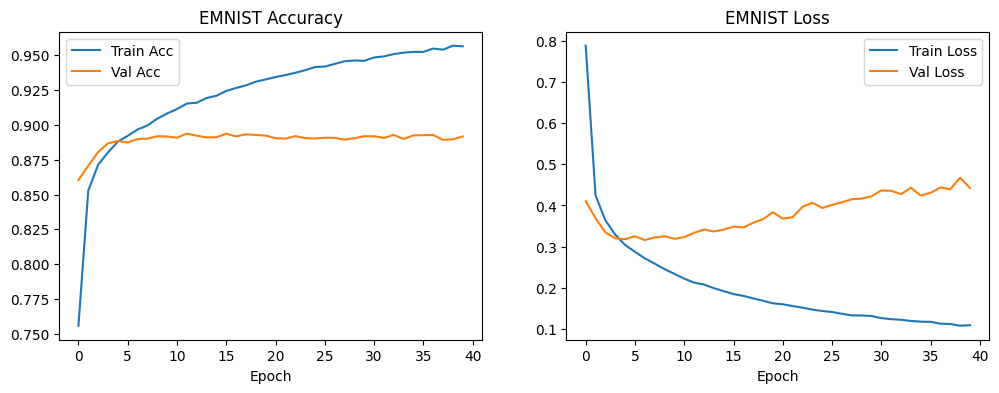

In [ ]:
def emnist_preprocess(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    image = tf.transpose(image, [1,0,2])   # rotate
    image = tf.image.flip_left_right(image) # fix orientation
    return tf.reshape(image, (IMG_SIZE, IMG_SIZE, 1)), label

em_train = ds_e_train.map(emnist_preprocess, num_parallel_calls=AUTOTUNE).shuffle(20000).batch(BATCH).prefetch(AUTOTUNE)
em_test  = ds_e_test.map(emnist_preprocess, num_parallel_calls=AUTOTUNE).batch(BATCH).prefetch(AUTOTUNE)

visualize_samples(ds_e_train, emnist_preprocess, n=6, title="EMNIST Examples")

def build_emnist_cnn(num_classes):
    inputs = tf.keras.Input((IMG_SIZE, IMG_SIZE, 1))
    x = tf.keras.layers.Conv2D(64, 3, activation="relu", padding="same")(inputs)
    x = tf.keras.layers.Conv2D(128, 3, activation="relu", padding="same")(x)
    x = tf.keras.layers.MaxPooling2D()(x)
    x = tf.keras.layers.Dropout(0.3)(x)

    x = tf.keras.layers.Conv2D(256, 3, activation="relu", padding="same")(x)
    x = tf.keras.layers.MaxPooling2D()(x)
    x = tf.keras.layers.Dropout(0.3)(x)

    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(512, activation="relu")(x)
    x = tf.keras.layers.Dropout(0.4)(x)
    outputs = tf.keras.layers.Dense(num_classes, activation="softmax")(x)
    return tf.keras.Model(inputs, outputs)

em_model = build_emnist_cnn(em_classes)
em_model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
em_model.summary()

hist_em = em_model.fit(em_train, validation_data=em_test, epochs=40, verbose=2)
plot_training_curves(hist_em, "EMNIST")


EMNIST Test Accuracy: 89.18%
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step
              precision    recall  f1-score   support

           0     0.6397    0.7500    0.6904       400
           1     0.5466    0.6450    0.5917       400
           2     0.9125    0.9125    0.9125       400
           3     0.9975    0.9825    0.9899       400
           4     0.9556    0.9150    0.9349       400
           5     0.9571    0.8925    0.9237       400
           6     0.9189    0.9625    0.9402       400
           7     0.9802    0.9925    0.9863       400
           8     0.9527    0.9575    0.9551       400
           9     0.7131    0.8450    0.7735       400
          10     0.9849    0.9775    0.9812       400
          11     0.9677    0.9725    0.9701       400
          12     0.9647    0.9575    0.9611       400
          13     0.9429    0.9075    0.9248       400
          14     0.9825    0.9825    0.9825       400
          15     0.7143    0.6000    0.6522       400
          16

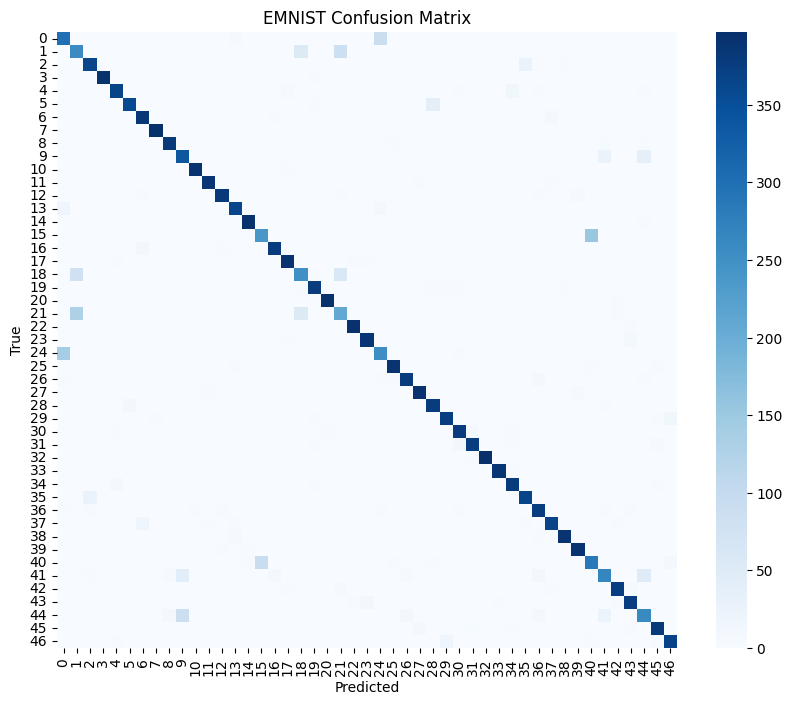

In [ ]:
# Evaluation
em_eval = em_model.evaluate(em_test, verbose=0)
print(f"EMNIST Test Accuracy: {em_eval[1]*100:.2f}%")

y_true_e = np.concatenate([y.numpy() for _, y in em_test], axis=0)
y_pred_e = np.argmax(em_model.predict(em_test), axis=1)
print(classification_report(y_true_e, y_pred_e, digits=4))
plot_confusion(y_true_e, y_pred_e, classes=list(range(em_classes)), title="EMNIST Confusion Matrix")

em_model.save("emnist_final.keras")
with open("emnist_labels.json","w") as f:
    json.dump(info_e.features["label"].names, f)

In [ ]:
# ============================================================
# Summary
# ============================================================
print(f"\nFinal Accuracy Results:")
print(f"MNIST: {mn_eval[1]*100:.2f}%")
print(f"EMNIST: {em_eval[1]*100:.2f}%")


Final Accuracy Results:
MNIST: 98.90%
EMNIST: 89.18%
